### Exercise 8.1
PH 295  
Nick Ball  
**Purpose:**
Program that solves a given equation for $V_{out}$ using a fourth-order Runge Kutta method and plots the output with given conditions below.

  
$$
\frac{dV_{out}}{dt} = \frac{1}{RC}(V_{in}-V_{out})
$$
  
*Input Signal*
$$
V_{in} = \begin{cases} 1 &\text{if$\lfloor 2t \rfloor$ is even}\\ -1 &\text{if$\lfloor 2t \rfloor$ is odd} \end{cases}
$$

In [3]:
#Import Libraries
from numpy import arange, linspace, ones_like
from matplotlib import pyplot as plt

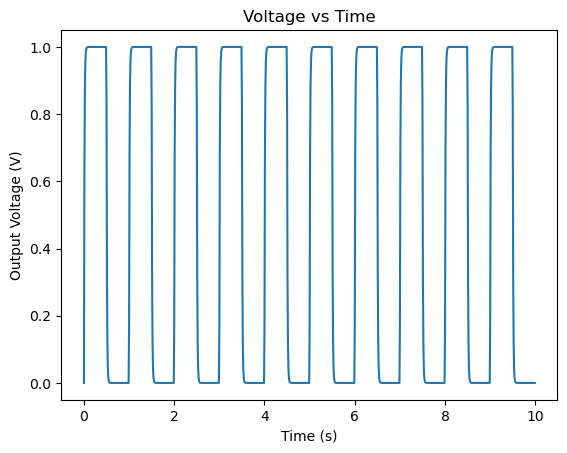

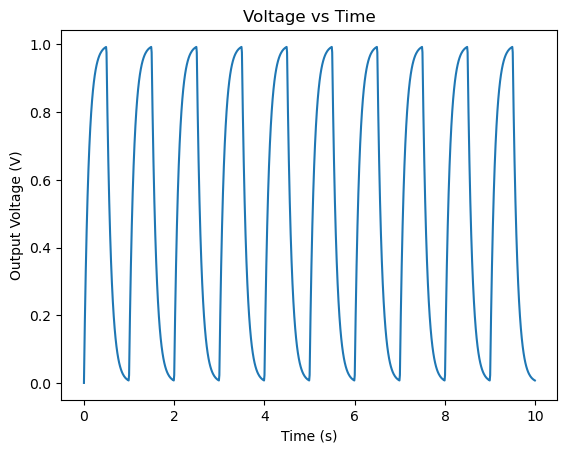

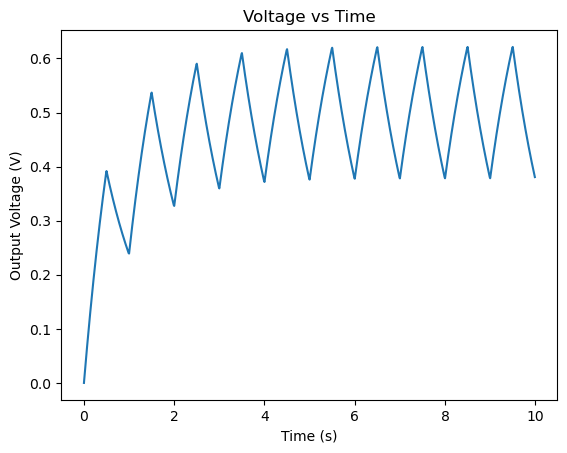

In [35]:
#Define functions
def Vin(t):  
    if int(2*t)%2 == 0:
        return 1
    else:
        return 0

def f(Vout,t,RC):
    return (Vin(t)-Vout)/RC

def RK4(r,t,RC):
    k1 = h*f(r,t,RC)
    k2 = h*f(r+0.5*k1,t+0.5*h,RC)
    k3 = h*f(r+0.5*k2,t+0.5*h,RC)
    k4 = h*f(r+k3,t+h,RC)
    return (k1+2*k2+2*k3+k4)/6

#Define Constants
a = 0        #Starting interval
b = 10       #Ending interval (s)
N = 1000      #Number of steps
h = (b-a)/N  #Step Size

#Define variables
tPoints = arange(a,b,h)
VoutPoints = []
RClist = [0.01,0.1,1]

#Set up Square wave (deprecated) 
#VinPoints = [1 if int(2*x)%2 == 0 else -1 for x in tPoints]

#Do Runge Kutta Method
for i in RClist:
    V = 0              #Reset V
    VoutPoints.clear()
    for t in tPoints:
        VoutPoints.append(V)
        V += RK4(V,t,i)
    
    #Show plot
    plt.figure(dpi = 100)
    plt.plot(tPoints,VoutPoints)
    plt.xlabel("Time (s)")
    plt.ylabel("Output Voltage (V)")
    plt.title("Voltage vs Time")
    plt.show()

**Conclusion:**
First one is a square wave, second is uhhhhhhhhg, and the third is a sawtooth (I think). The circuit appears to be oscillating between voltages of some maximum and 0 (or ~0.35 for the last one). Looks cool, but I spent too much time on list comprehension.